In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install geopandas
import geopandas as gpd

from google.colab import drive
drive.mount('/content/drive/')



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 33.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 70.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 34.5 MB/s eta 0:00:00
Mounted at /content/drive/


In [ ]:
food = pd.read_csv('/content/drive/My Drive/Data Science: Food Security/data/PREPROCESSED: Food Insecurity.csv', index_col=False)
print(len(food.Country.unique()))
print(food.Year.unique())
food['index'] = food['Unnamed: 0']
food = food.set_index('index', drop=True)
food = food.drop('Unnamed: 0', axis=1)
food

204
[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015 2016 2017 2018 2019 2020 2021]


,Country,Year,Average dietary energy supply adequacy (percent) (3-year average),Dietary energy supply used in the estimation of prevalence of undernourishment (kcal/cap/day) (3-year average),"Share of dietary energy supply derived from cereals, roots and tubers (kcal/cap/day) (3-year average)",Average protein supply (g/cap/day) (3-year average),Average supply of protein of animal origin (g/cap/day) (3-year average),Prevalence of undernourishment (percent) (3-year average),Number of people undernourished (million) (3-year average),Cereal import dependency ratio (percent) (3-year average),...,Prevalence of anemia among women of reproductive age (15-49 years),Number of women of reproductive age (15-49 years) affected by anemia (million),Minimum dietary energy requirement (kcal/cap/day),Average dietary energy requirement (kcal/cap/day),Coefficient of variation of habitual caloric consumption distribution (real number),Incidence of caloric losses at retail distribution level (percent),Average fat supply (g/cap/day) (3-year average),Percentage of population using safely managed sanitation services (Percent),Prevalence of low birthweight (percent),Number of newborns with low birthweight (million)
index,,,,,,,,,,,,,,,,,,,,,
"Afghanistan,2000",Afghanistan,2000,87.0,1761.0,77.0,51.4,13.0,47.8,10.3,34.2,...,35.7,1.5,1602.0,2019.0,0.32,3.03,29.0,NaN,NaN,NaN
"Afghanistan,2001",Afghanistan,2001,88.0,1787.0,78.0,52.1,12.7,45.6,10.3,29.5,...,35.6,1.6,1605.0,2024.0,0.31,2.88,28.0,NaN,NaN,NaN
"Afghanistan,2002",Afghanistan,2002,91.0,1851.0,77.0,54.0,13.3,40.6,9.6,21.2,...,35.4,1.7,1610.0,2032.0,0.30,3.00,30.7,NaN,NaN,NaN
"Afghanistan,2003",Afghanistan,2003,92.0,1882.0,76.0,54.0,13.0,38,9.4,18.5,...,35.4,1.7,1616.0,2040.0,0.29,2.92,33.1,NaN,NaN,NaN
"Afghanistan,2004",Afghanistan,2004,92.0,1901.0,76.0,53.6,12.3,36.1,9.2,19.2,...,35.5,1.8,1621.0,2049.0,0.28,2.80,33.6,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Zimbabwe,2017",Zimbabwe,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.6,...,28.8,1.1,1734.0,2216.0,0.32,2.13,51.3,26.6,NaN,NaN
"Zimbabwe,2018",Zimbabwe,2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,28.8,1.1,1740.0,2224.0,0.32,2.13,NaN,26.3,NaN,NaN
"Zimbabwe,2019",Zimbabwe,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,28.9,1.1,1746.0,2232.0,0.31,2.13,NaN,26.0,NaN,NaN


In [ ]:
# Drop years and countries without data for # of food insecure (37 countries, years 2020 and onwards)
# # List of countries dropped: 'American Samoa', 'Andorra', 'Antigua and Barbuda', 'Bahamas',
#        'Bahrain', 'Bermuda', 'Bhutan', 'Burundi', 'Cook Islands',
#        'Equatorial Guinea', 'Eritrea', 'Greenland', 'Grenada', 'Guinea',
#        'Libya', 'Maldives', 'Marshall Islands',
#        'Micronesia (Federated States of)', 'Mozambique', 'Nauru', 'Niue',
#        'Palau', 'Palestine', 'Puerto Rico', 'Qatar', 'Saint Kitts and Nevis',
#        'Saint Lucia', 'Seychelles', 'Singapore', 'Somalia', 'South Sudan',
#        'Syrian Arab Republic', 'Tokelau', 'Tonga', 'Tuvalu', 'Uganda',
#        'Zimbabwe'

food = food.dropna(subset = 'Prevalence of undernourishment (percent) (3-year average)')



In [ ]:
# Look at first and last year to determine correlaton of indicators 
food_2000 = food[food['Year'] == 2000]
food_2000 = food_2000.set_index('Country', drop=True)
food_2019 = food[food['Year'] == 2019]
food_2019 = food_2019.set_index('Country', drop=True)

country = food_2000.index

# Clean Data
new_2000 = pd.DataFrame()
new_2019 = pd.DataFrame()
for col in food_2000.columns:
  new_col_2000 = []
  new_col_2019 = []
  for string in food_2000[col]:
    if type(string) == str:
      new_col_2000.append(float(string.strip('<')))
    else: new_col_2000.append(string)
  for string in food_2019[col]:
    if type(string) == str:
      new_col_2019.append(float(string.strip('<')))
    else: new_col_2019.append(string)
  new_2000[col] = new_col_2000
  new_2019[col] = new_col_2019
food_2000 = new_2000
food_2019 = new_2019


food_2000['Country'] = country
food_2019['Country'] = country
food_2000 = food_2000.set_index('Country', drop=True)
food_2019 = food_2019.set_index('Country', drop=True)

# Fix country name discrepency
food_2000.loc['Russia'] = food_2000.loc['Russian Federation']
food_2019.loc['Russia'] = food_2019.loc['Russian Federation']

# Fix NAN Values

# Drop columns with large number of missing data
for col in food_2000: 
  if food_2000[col].isna().sum() >= 20:
    food_2000 = food_2000.drop(col, axis=1)
  if food_2019[col].isna().sum() >= 20:
    food_2019 = food_2019.drop(col, axis=1)

# Replace with average for small # of missing data:
for col in food_2000: 
  food_2000[col] = food_2000[col].fillna(food_2000[col].mean())
for col in food_2019: 
  food_2019[col] = food_2019[col].fillna(food_2019[col].mean())

food_2000

,Year,Average dietary energy supply adequacy (percent) (3-year average),Dietary energy supply used in the estimation of prevalence of undernourishment (kcal/cap/day) (3-year average),"Share of dietary energy supply derived from cereals, roots and tubers (kcal/cap/day) (3-year average)",Average protein supply (g/cap/day) (3-year average),Average supply of protein of animal origin (g/cap/day) (3-year average),Prevalence of undernourishment (percent) (3-year average),Cereal import dependency ratio (percent) (3-year average),Percent of arable land equipped for irrigation (percent) (3-year average),Value of food imports in total merchandise exports (percent) (3-year average),...,Percentage of population using at least basic sanitation services (percent),Prevalence of obesity in the adult population (18 years and older),Number of obese adults (18 years and older) (million),Prevalence of anemia among women of reproductive age (15-49 years),Number of women of reproductive age (15-49 years) affected by anemia (million),Minimum dietary energy requirement (kcal/cap/day),Average dietary energy requirement (kcal/cap/day),Coefficient of variation of habitual caloric consumption distribution (real number),Incidence of caloric losses at retail distribution level (percent),Average fat supply (g/cap/day) (3-year average)
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,2000.0,87.0,1761.000000,77.0,51.4,13.0,47.8,34.2,41.7,240.0,...,21.900000,2.3,0.2,35.7,1.5,1602.000000,2019.000000,0.320000,3.03,29.0
Albania,2000.0,122.0,2940.000000,49.0,93.0,41.0,4.9,47.0,59.3,75.0,...,89.500000,13.2,0.3,26.2,0.2,1864.000000,2407.000000,0.240000,2.19,78.3
Algeria,2000.0,127.0,2938.000000,59.0,77.0,19.0,8.0,79.7,8.1,13.0,...,84.500000,17.4,3.1,37.6,3.1,1780.000000,2292.000000,0.300000,3.85,66.3
Angola,2000.0,74.0,1569.000000,66.0,40.4,12.3,67.5,57.1,2.8,7.0,...,27.600000,3.6,0.3,51.8,1.9,1655.000000,2100.000000,0.300000,3.62,39.0
Argentina,2000.0,132.0,3147.000000,35.0,98.3,61.6,3.0,-172.3,5.7,3.0,...,87.200000,20.7,5.1,16.2,1.5,1840.000000,2381.000000,0.250000,3.66,109.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela (Bolivarian Republic of),2000.0,105.0,2413.000000,39.0,63.3,31.7,14.9,49.6,24.4,5.0,...,66.284177,19.4,2.8,27.4,1.7,1786.000000,2295.000000,0.230000,3.39,68.3
Viet Nam,2000.0,103.0,2328.000000,69.0,56.0,15.3,19.7,-12.0,61.8,5.0,...,51.900000,0.6,0.3,27.3,5.9,1742.000000,2237.000000,0.260000,2.94,41.0
Yemen,2000.0,101.0,2093.000000,65.0,57.0,10.3,26.7,80.5,33.9,22.0,...,45.200000,8.8,0.7,66.1,2.4,1635.000000,2067.000000,0.280000,3.60,40.7


In [ ]:
from sklearn.cluster import DBSCAN
#Parmaters
eps = 125
min_samples = 4

clustDBSCAN = DBSCAN(eps = eps, min_samples = min_samples)
food_2000 = food_2000.astype(float)
clustDBSCAN.fit(food_2000)
cluster_labels_2000 = clustDBSCAN.labels_
n_clusters = len(np.unique(cluster_labels_2000)) - 1
print('number of clusters (excluding outliers)', n_clusters)

number of clusters (excluding outliers) 4


In [ ]:
eps = 80
min_samples = 4

clustDBSCAN = DBSCAN(eps = eps, min_samples = min_samples)
food_2019 = food_2019.astype(float)
clustDBSCAN.fit(food_2019)
cluster_labels_2019 = clustDBSCAN.labels_
n_clusters = len(np.unique(cluster_labels_2019)) - 1
print('number of clusters (excluding outliers)', n_clusters)

number of clusters (excluding outliers) 4


In [ ]:
food_2000['Clusters'] = cluster_labels_2000
food_2019['Clusters'] = cluster_labels_2019

In [ ]:
# Visualize Food Security Data using GeoPandas (before clustering, and then to plot the clusters and compare)

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world[['name', 'geometry']]
world = world.set_index('name', drop=True)
world_2000 = pd.merge(world, food_2000[['Prevalence of undernourishment (percent) (3-year average)', 'Clusters']], left_index = True, right_index = True)
world_2019 = pd.merge(world, food_2019[['Prevalence of undernourishment (percent) (3-year average)', 'Clusters']], left_index = True, right_index = True)
world_2000['Clusters'].values


<ipython-input-8-8baf8c6550dc>:3: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


array([ 0,  1,  1,  0,  2,  2,  2, -1,  0,  2,  2,  2, -1,  0,  1, -1,  0,
        2, -1, -1,  0,  2,  0,  2,  0,  2,  2,  3,  2,  3,  3,  2,  1,  2,
        0,  0,  2,  2,  2,  2,  3,  2,  3,  3,  2,  2,  3,  3,  3,  2, -1,
        2,  2,  3,  3,  2, -1, -1,  0,  2, -1, -1,  0,  3, -1,  0,  2,  3,
        3,  2,  0,  2,  2, -1,  2,  2,  2, -1, -1,  2,  3, -1,  0,  0,  0,
        1,  1,  0,  1,  0,  0,  0,  1,  0,  1,  0,  0,  1,  1,  1,  0,  1,
        1,  1,  3,  0, -1,  2,  0,  1,  1,  0,  2,  0,  2,  0,  0,  0,  0,
        0,  0,  3,  2,  0,  0,  0, -1, -1, -1,  2,  0,  0,  0,  0])

<Axes: title={'center': 'Clustering by Food Insecurity Indicators (2000)'}, xlabel='Longitude', ylabel='Latitude'>

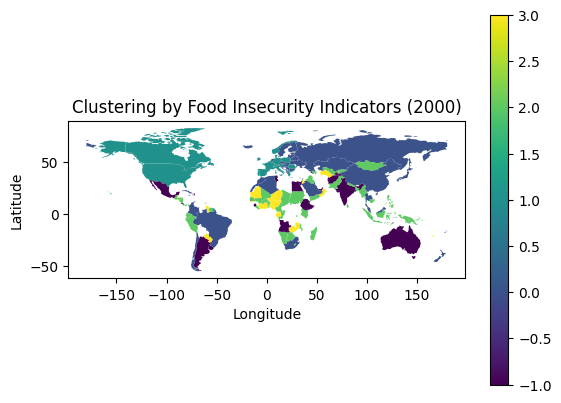

In [ ]:
ax = world_2000.plot('Clusters', legend=True)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_title("Clustering by Food Insecurity Indicators (2000)")
ax

<Axes: title={'center': 'Clustering by Food Insecurity Indicators (2019)'}, xlabel='Longitude', ylabel='Latitude'>

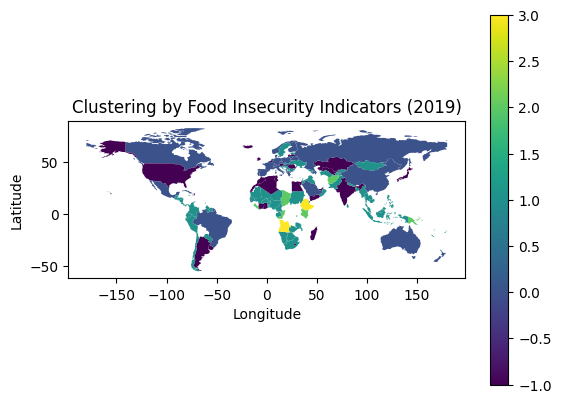

In [ ]:
ax = world_2019.plot('Clusters', legend=True)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_title("Clustering by Food Insecurity Indicators (2019)")
ax

<Axes: title={'center': 'Percent of Population Food Insecure (2000)'}, xlabel='Longitude', ylabel='Latitude'>

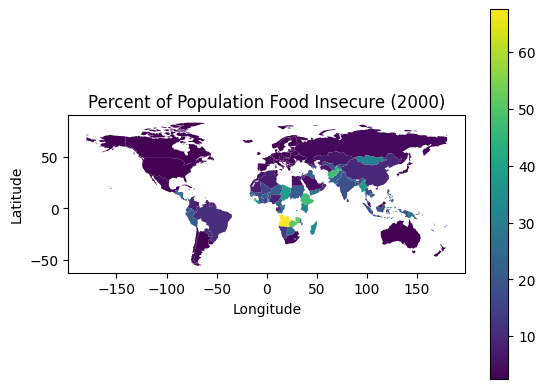

In [ ]:
ax = world_2000.plot('Prevalence of undernourishment (percent) (3-year average)', legend=True)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_title("Percent of Population Food Insecure (2000)")
ax

<Axes: title={'center': 'Percent of Population Food Insecure (2019)'}, xlabel='Longitude', ylabel='Latitude'>

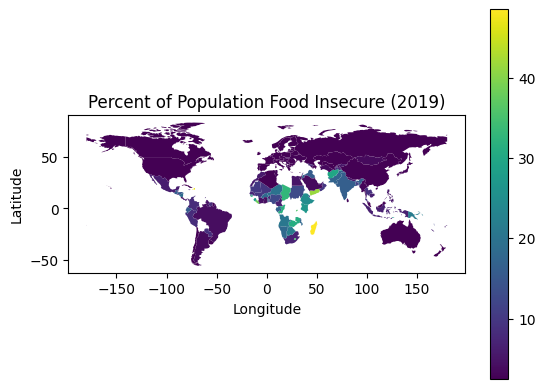

In [ ]:
ax = world_2019.plot('Prevalence of undernourishment (percent) (3-year average)', legend=True)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_title("Percent of Population Food Insecure (2019)")
ax

<Axes: title={'center': '% Change in Food Insecurity (2000-2019)'}, xlabel='Longitude', ylabel='Latitude'>

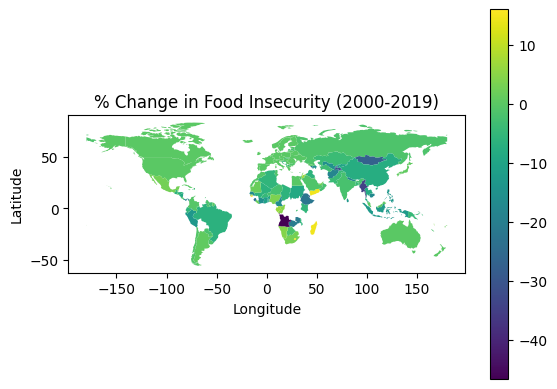

In [ ]:
world_2000['diff'] = world_2019['Prevalence of undernourishment (percent) (3-year average)'] - world_2000['Prevalence of undernourishment (percent) (3-year average)']
ax = world_2000.plot('diff', legend=True)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_title("% Change in Food Insecurity (2000-2019)")
ax